# Anàlisis de sentimientos

Anàlisis de sentimientos

In [33]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

from matplotlib import style
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords 
!pip install wordcloud 
#import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [34]:
tweets_bgates= pd.read_csv("https://raw.githubusercontent.com/JIMMYLEOR/Datos/main/BillGates.csv") 
tweets_elon= pd.read_csv("https://raw.githubusercontent.com/JIMMYLEOR/Datos/main/elonmusk.csv") 
tweets_mayoredlee= pd.read_csv("https://raw.githubusercontent.com/JIMMYLEOR/Datos/main/mayoredlee.csv")

In [35]:
tweets_bgates

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,retweet_status_id,in_reply_to_status_status_id,in_reply_to_status_user_id,in_reply_to_status_screen_name,lang,source,media_id,media_url,media_url_expanded,urls,urls_display,urls_expanded,mentions_screen_name,mentions_user_id,symbols,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,BillGates,50393960,2017-11-09T20:09:06Z,9.287161e+17,Tanzania hopes to eliminate one of the world’s...,608,2483,False,NaN,False,NaN,NaN,NaN,NaN,en,Media Studio,NaN,NaN,NaN,NaN,twitter.com/i/web/status/9…,https://twitter.com/i/web/status/9287160958585...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BillGates,50393960,2017-11-08T16:39:30Z,9.283010e+17,"By investing in R&amp;D, I know we can discove...",1090,5321,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter for Windows,NaN,NaN,NaN,NaN,twitter.com/i/web/status/9…,https://twitter.com/i/web/status/9283009615749...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BillGates,50393960,2017-11-07T17:43:05Z,9.279546e+17,This unusual tool for fighting disease turns o...,830,4653,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter for Windows,NaN,NaN,NaN,NaN,b-gat.es/2zoeqkF,http://b-gat.es/2zoeqkF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BillGates,50393960,2017-11-02T17:42:19Z,9.261424e+17,My first trip to Africa with Melinda was the c...,1421,10944,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter for Windows,NaN,NaN,NaN,NaN,twitter.com/i/web/status/9…,https://twitter.com/i/web/status/9261424407922...,NaN,NaN,NaN,MyGivingStory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BillGates,50393960,2017-10-30T04:01:05Z,9.248486e+17,"“The death that didn’t happen is not visible.""...",918,3508,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter for Windows,NaN,NaN,NaN,NaN,b-gat.es/2gWuGVB,http://b-gat.es/2gWuGVB,Atul_Gawande Gladwell,233364902 17889970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,BillGates,50393960,2011-10-19T22:12:21Z,1.267828e+17,"Malaria eradication is an ambitious, long-term...",740,134,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter Web Client,NaN,NaN,NaN,NaN,b-gat.es/qX03eS,http://b-gat.es/qX03eS,melindagates,161801527,NaN,endmalaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2083,BillGates,50393960,2011-10-06T00:38:09Z,1.217460e+17,For those of us lucky enough to get to work wi...,32057,3743,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter Web Client,NaN,NaN,NaN,NaN,b-gat.es/qHXDsU,http://b-gat.es/qHXDsU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,BillGates,50393960,2011-10-06T00:37:29Z,1.217459e+17,Melinda and I extend our sincere condolences t...,17620,1846,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter Web Client,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2085,BillGates,50393960,2011-10-04T19:06:05Z,1.213001e+17,"The crisis in Somalia has claimed 30,000 child...",1483,148,False,NaN,False,NaN,NaN,NaN,NaN,en,Twitter Web Client,NaN,NaN,NaN,NaN,b-gat.es/oHHIeM,http://b-gat.es/oHHIeM,ONECampaign,16348549,NaN,endfamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print(tweets_bgates.shape[1])
print(tweets_elon.shape)
print(tweets_mayoredlee.shape)

35
(2678, 35)
(2447, 35)


In [37]:
print(tweets_bgates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   screen_name                     2087 non-null   object 
 1   user_id                         2087 non-null   int64  
 2   created_at                      2087 non-null   object 
 3   status_id                       2087 non-null   float64
 4   text                            2087 non-null   object 
 5   retweet_count                   2087 non-null   int64  
 6   favorite_count                  2087 non-null   int64  
 7   is_quote_status                 2087 non-null   bool   
 8   quote_status_id                 22 non-null     float64
 9   is_retweet                      2087 non-null   bool   
 10  retweet_status_id               0 non-null      float64
 11  in_reply_to_status_status_id    47 non-null     float64
 12  in_reply_to_status_user_id      51

In [38]:
#print(tweets_bgates['text'])
allWordBG = ' '.join([twts for twts in tweets_bgates['text']]) 
#allWordBG


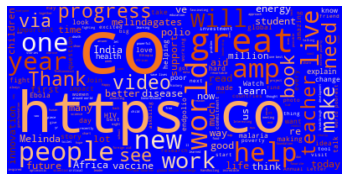

In [39]:
wordcloud = WordCloud(background_color="blue", colormap="Oranges_r", max_font_size=90).generate(allWordBG)  
plt.imshow(wordcloud,interpolation="bilinear") 
plt.axis("off") 
imagen = wordcloud.to_image() 
imagen.save("nubedepalabraspython1.png")
imagen.show()

In [40]:
tweets = pd.concat([tweets_bgates,tweets_elon,tweets_mayoredlee],ignore_index = True) 
tweets = tweets[['screen_name','created_at','status_id','text']] 
tweets.columns = ['autor','fecha','id','texto'] 
tweets['fecha'] = pd.to_datetime(tweets['fecha'])
tweets.info()
tweets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   autor   7212 non-null   object             
 1   fecha   7212 non-null   datetime64[ns, UTC]
 2   id      7212 non-null   float64            
 3   texto   7212 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 225.5+ KB


,autor,fecha,id,texto
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,Tanzania hopes to eliminate one of the world’s...
1,BillGates,2017-11-08 16:39:30+00:00,9.283010e+17,"By investing in R&amp;D, I know we can discove..."
2,BillGates,2017-11-07 17:43:05+00:00,9.279546e+17,This unusual tool for fighting disease turns o...
3,BillGates,2017-11-02 17:42:19+00:00,9.261424e+17,My first trip to Africa with Melinda was the c...
4,BillGates,2017-10-30 04:01:05+00:00,9.248486e+17,"“The death that didn’t happen is not visible.""..."
...,...,...,...,...
7207,mayoredlee,2015-06-21 17:38:40+00:00,6.126760e+17,Bet fulfilled! Thank you Mayor Sly James for h...
7208,mayoredlee,2015-06-20 23:17:06+00:00,6.123988e+17,Mayors who have raised the #MinimumWage includ...
7209,mayoredlee,2015-06-20 17:54:32+00:00,6.123176e+17,Inspired by words of The Hon. @HillaryClinton ...
7210,mayoredlee,2015-06-20 14:42:22+00:00,6.122693e+17,Made it across GGB with mayors including Mayor...


In [41]:
#import string
def barrer(texto): 
  convertir  = texto.lower()
  convertir = re.sub('http\S+',' ',convertir) 
  convertir = re.sub("d+",' ',convertir)
  convertir = re.sub("\\s+",' ',convertir)
  dieferentes ='[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
  #dieferentes = '[\\@\\#\\&\\>\\©]' 
  convertir = re.sub(dieferentes,' ',convertir)
  convertir = convertir.split(sep = ' ') 
  convertir = [token for token in convertir if len(token)  > 1]
  return(convertir)

tweets['token']=tweets['texto'].apply(lambda x: barrer(x))
tweets


,autor,fecha,id,texto,token
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,Tanzania hopes to eliminate one of the world’s...,"[tanzania, hopes, to, eliminate, one, of, the,..."
1,BillGates,2017-11-08 16:39:30+00:00,9.283010e+17,"By investing in R&amp;D, I know we can discove...","[by, investing, in, amp, know, we, can, iscove..."
2,BillGates,2017-11-07 17:43:05+00:00,9.279546e+17,This unusual tool for fighting disease turns o...,"[this, unusual, tool, for, fighting, isease, t..."
3,BillGates,2017-11-02 17:42:19+00:00,9.261424e+17,My first trip to Africa with Melinda was the c...,"[my, first, trip, to, africa, with, melin, was..."
4,BillGates,2017-10-30 04:01:05+00:00,9.248486e+17,"“The death that didn’t happen is not visible.""...","[“the, eath, that, n’t, happen, is, not, visib..."
...,...,...,...,...,...
7207,mayoredlee,2015-06-21 17:38:40+00:00,6.126760e+17,Bet fulfilled! Thank you Mayor Sly James for h...,"[bet, fulfille, thank, you, mayor, sly, james,..."
7208,mayoredlee,2015-06-20 23:17:06+00:00,6.123988e+17,Mayors who have raised the #MinimumWage includ...,"[mayors, who, have, raise, the, minimumwage, i..."
7209,mayoredlee,2015-06-20 17:54:32+00:00,6.123176e+17,Inspired by words of The Hon. @HillaryClinton ...,"[inspire, by, wor, of, the, hon, hillaryclinto..."
7210,mayoredlee,2015-06-20 14:42:22+00:00,6.122693e+17,Made it across GGB with mayors including Mayor...,"[ma, it, across, ggb, with, mayors, inclu, ing..."


In [42]:
tweets_sepa = tweets.explode(column='token') 
tweets_sepa = tweets_sepa.drop(columns='texto') 
tweets_sepa

,autor,fecha,id,token
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,tanzania
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,hopes
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,to
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,eliminate
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,one
...,...,...,...,...
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,amp
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,our
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,resi
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,ents


In [43]:
tweets_sepa = tweets_sepa.rename(columns={'autor':'usuario'})
print('Conteo')
print(tweets_sepa.groupby(by='usuario')['token'].count())
print('-'*50)
print('Sin repetir')
print(tweets_sepa.groupby(by='usuario')['token'].nunique())


Conteo
usuario
BillGates     33196
elonmusk      35330
mayoredlee    44466
Name: token, dtype: int64
--------------------------------------------------
Sin repetir
usuario
BillGates     4783
elonmusk      6624
mayoredlee    5784
Name: token, dtype: int64


In [44]:
tweets_sepa.groupby(['usuario','token'])['token'] \
  .count() \
  .reset_index(name='count') \
  .groupby('usuario') \
  .apply(lambda x: x.sort_values('count', ascending=False).head(2))

usuario token  count
usuario                                  
BillGates  4137    BillGates   the   1181
           4212    BillGates    to   1179
elonmusk   10602    elonmusk   the    982
           10718    elonmusk    to    957
mayoredlee 16574  mayoredlee    to   1859
           16495  mayoredlee   the   1338

In [45]:
nltk.download('stopwords')
stop_words= list(stopwords.words('english')) 
stop_words.extend(['amp;'])
stop_words
tweets_sepa= tweets_sepa[~(tweets_sepa["token"].isin(stop_words))]
tweets_sepa

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,usuario,fecha,id,token
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,tanzania
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,hopes
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,eliminate
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,one
0,BillGates,2017-11-09 20:09:06+00:00,9.287161e+17,worl
...,...,...,...,...
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,future
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,amp
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,resi
7211,mayoredlee,2015-06-20 05:50:19+00:00,6.121354e+17,ents


In [46]:
diccionario = pd.read_table('https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento'])
diccionario

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
3377,yucky,-2
3378,yummy,3
3379,zealot,-2
3380,zealots,-2


In [47]:
tweets_asye = pd.merge(left=tweets_sepa, right=diccionario, left_on="token", right_on="termino", how = "inner") 
tweets_asye 
tweets_asye = tweets_asye[["usuario","fecha","id","sentimiento","termino"]]\
.groupby(["usuario","fecha","id"])\
.sum().reset_index()
tweets_asye


,usuario,fecha,id,sentimiento
0,BillGates,2011-09-29 21:11:15+00:00,1.195196e+17,4
1,BillGates,2011-10-04 19:06:05+00:00,1.213001e+17,-5
2,BillGates,2011-10-06 00:37:29+00:00,1.217459e+17,2
3,BillGates,2011-10-06 00:38:09+00:00,1.217460e+17,6
4,BillGates,2011-10-19 22:12:21+00:00,1.267828e+17,2
...,...,...,...,...
4904,mayoredlee,2017-11-09 01:15:47+00:00,9.284309e+17,0
4905,mayoredlee,2017-11-09 01:19:25+00:00,9.284318e+17,2
4906,mayoredlee,2017-11-09 18:59:04+00:00,9.286985e+17,2
4907,mayoredlee,2017-11-09 19:27:42+00:00,9.287057e+17,5


In [48]:
def analisisS(df):
    print("Positivos " + str(round(100 * np.mean(datasentimiento.sentimiento > 0), 2)))
    print("Neutros   " + str(round(100 * np.mean(datasentimiento.sentimiento == 0), 2)))
    print("Negativos " + str(round(100 * np.mean(datasentimiento.sentimiento < 0), 2)))
   



for usuario, datasentimiento in tweets_asye.groupby("usuario"):
  print("-" * 25)
  print("Sentimientos de "+usuario) 
  print("-" * 25)
  analisisS(datasentimiento)
  print(" ")


-------------------------
Sentimientos de BillGates
-------------------------
Positivos 83.41
Neutros   3.75
Negativos 12.85
 
-------------------------
Sentimientos de elonmusk
-------------------------
Positivos 77.04
Neutros   4.14
Negativos 18.82
 
-------------------------
Sentimientos de mayoredlee
-------------------------
Positivos 80.79
Neutros   4.31
Negativos 14.91
 


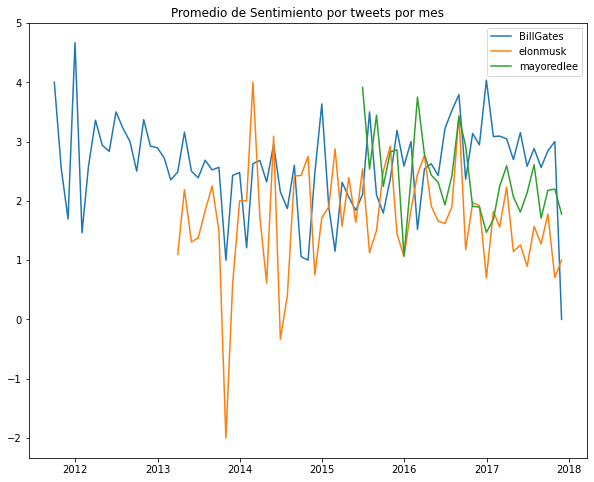

In [49]:
fig, ax = plt.subplots(figsize=(10, 8)) 

for usuario in tweets_sepa.usuario.unique():
    data = tweets_asye[tweets_asye.usuario == usuario].copy()
    data = data.set_index("fecha")
    data = data[['sentimiento']].resample('M').mean()
    ax.plot(data.index, data, label=usuario)

ax.set_title("Promedio de Sentimiento por tweets por mes")
ax.legend();

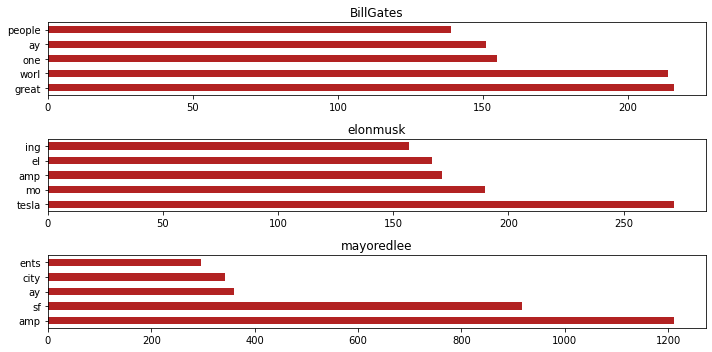

In [72]:

fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(10, 5))
for i, usuario in enumerate(tweets_sepa.usuario.unique()):
    datos = tweets_sepa[tweets_sepa.usuario == usuario]
    counts  = datos['token'].value_counts(ascending=False).head(5)
    counts.plot(kind='barh', color='firebrick', ax=axs[i])
    axs[i].set_title(usuario)
    #axs[i].invert_yaxis()
    
fig.tight_layout()